In [1]:
import os
os.chdir('../')
import warnings
warnings.filterwarnings(action='ignore',
    category=DeprecationWarning)

import matplotlib.pyplot as plt
plt.style.use('bmh')

import numpy as np
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
%matplotlib inline

## I begin with

In [9]:
fnames = glob('mocha/IR/next/*')
spectrums = [pd.read_csv(fname, sep='\t', header=None)[1] for fname in fnames]
spectrums = pd.concat(spectrums, axis=1).T
spectrums = spectrums.reset_index(drop=True)
spectrums.index.name = 'spectrum'
spectrums = spectrums.iloc[:, 160:]
spectrums.columns = pd.read_csv(fnames[0], sep='\t', header=None)[0].iloc[160:]

In [10]:
spectrums['label'] = np.tile(np.arange(5), 10)
grouped_mean = spectrums.groupby('label').mean()
grouped_std = spectrums.groupby('label').std()

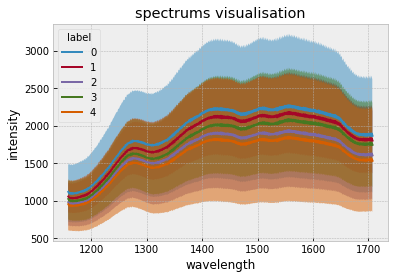

In [11]:
x = np.tile(grouped_mean.columns.values.astype(int), 5).reshape(5, -1)
y1 = (grouped_mean - grouped_std).values
y2 = (grouped_mean + grouped_std).values
grouped_mean.T.plot()
for xj, y1j, y2j in zip(x, y1, y2):
    plt.fill_between(xj, y1j, y2j, alpha=0.5)
plt.title('spectrums visualisation')
plt.xlabel('wavelength')
plt.ylabel('intensity')
plt.savefig('plots/spectrums_visualisation_ir_range_2.png', dpi=100)

In [12]:
labels = spectrums['label']
spectrums = spectrums.drop(columns='label')

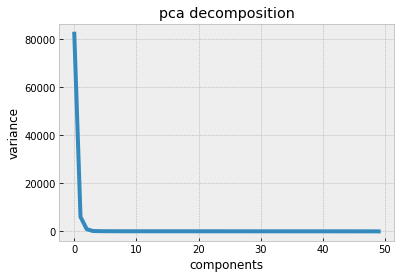

In [13]:
pca_decomposer = PCA(n_components=None)
pca_decomposer.fit(spectrums)
plt.plot(pca_decomposer.singular_values_, lw=4)
plt.xlabel('components')
plt.ylabel('variance')
plt.title('pca decomposition')
plt.savefig('plots/pca_decomposition_ir.png', dpi=100)

In [14]:
pca_decomposer = PCA(n_components=5)
objects = pca_decomposer.fit_transform(spectrums)
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
cross_val_score(model, objects, labels, scoring='accuracy', cv=4)

array([0.26666667, 0.2       , 0.1       , 0.3       ])

In [15]:
model = Pipeline([('pca', PCA(5)), ('linear', LogisticRegression())])
cross_val_score(model, spectrums, labels, scoring='accuracy', cv=4)

array([0.26666667, 0.26666667, 0.3       , 0.2       ])